In [7]:
from qiskit import *
from qiskit.circuit.library import QFT
import numpy as np

from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, \
Estimator, Session, Options

service = QiskitRuntimeService(channel='ibm_quantum')

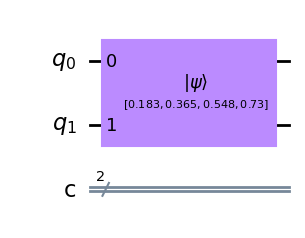

In [2]:
q = QuantumRegister(2,'q')   # Initialization of quantum registers
c = ClassicalRegister(2,'c') # Initialization of classical registers

qc = QuantumCircuit(q,c)     # Initialization of quantum circuit
vector = np.array([1, 2, 3, 4]) / np.sqrt(30)  # Normalizing a vector
qc.initialize(vector)  # Initialization of the vector into the quantum circuit
qc.draw('mpl') # Drawing the quantum circuit

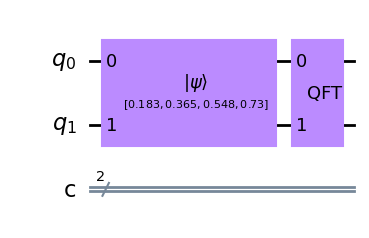

In [3]:
qft = QFT(num_qubits=2, do_swaps=True).to_gate() # Creating QFT
qc.append(qft, qargs=[0, 1]) # Appending QFT to the circuit
qc.draw('mpl') # Drawing the quantum circuit

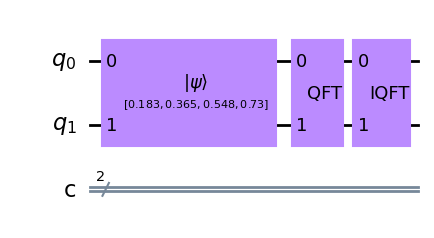

In [4]:
iqft = QFT(num_qubits=2, do_swaps=True, inverse=True).to_gate() 
# Creating IQFT
qc.append(iqft, qargs=[0, 1]) 
qc.draw('mpl') # Drawing the quantum circuit

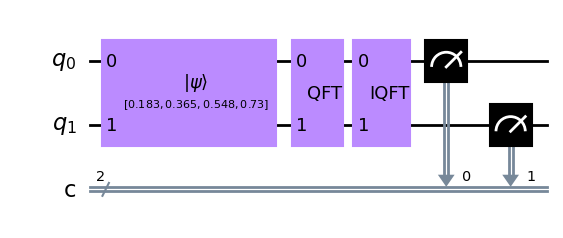

In [5]:
qc.measure(range(2), range(2)) # Measurement process on both qubits
qc.draw('mpl') # Drawing the quantum circuit

In [8]:
simulator = Aer.get_backend('statevector_simulator')
# Choosing simulator/quantum computer
job_sim = simulator.run(transpile(qc, simulator), shots=1000).result()
# Executing the circuit 1000 times on the simulator
counts = job_sim.get_counts(qc) # Measuring the frequencies
probs = [v/1000 for v in counts.values()] # Normalization
print(probs)

[0.034, 0.269, 0.143, 0.554]
